## 挑战任务二：神秘空间的引力规律（下）

### 1. 开普勒第三定律

在我们熟悉的太阳系里，行星绕着太阳转，月亮绕着地球转，它们都遵循一个重要的规律：离中心天体越远（绕转半径 $r$ 越大），绕一圈所需的时间（绕转周期 $T$ ）越长。这个周期和半径有个明确的定量关系：周期 $T$ 的平方与其绕转半径 $r$ 的立方成正比（$T^2 \propto r^3$），或者等价地，$T = k r^{3/2}$。这样的周期定律被称为开普勒第三定律。

<img src="problem.png" style="zoom:15%;" align="center"/>

天文学家在最近的深空观测中发现了若干个特殊的星系系统，这些系统存在一些异常的行为。天文学家通过高精度望远镜获得了这些系统中所有星系的天体轨道数据（周期 $T$ 和半径 $r$ ），如图所示。从图中可以看到，绝大部分天体（记为群体 $A$ ）的 $(T, r)$ 数据点都分布在一条平滑的曲线上，但同时也存在一些少量离群的数据点 (记为群体 $B$) 。

<img src="plt.png" style="zoom:65%;" align="center"/>

天文学家猜测星系中占绝大部分的群体 $A$ 仍然满足 $T = k_1  r^{\alpha_1}$ 这样的幂律关系，只不过 $k_1$ 和 $\alpha_1$ 与太阳系的数据不同。为了想进一步研究这些星系背后的物理机制，科学家首先需要定量地对采集到的数据进行处理。其中尤为重要的第一步便是分析占系统中占绝大部分的群体 $A$ 的物理机制 $T = k_1 r^{\alpha_1}$，确定主导的物理机制参数 $k_1$ 和 $\alpha_1$。



### 2. 指数与对数

对于任意实数 $a$（称为底数）和任意正整数 $n$（称为指数），定义指数运算：
$$
a^n = \underbrace{a \times a \times \cdots \times a}_{n \text{ 个}}
$$
对于任意两个正实数 $a$ 和 $y$（其中 $a > 0, a \neq 1, y > 0$），如果存在唯一的一个实数 $x$，使得：
$$
a^x = y
$$
那么，这个数 $x$ 就叫做以 $a$ 为底 $y$ 的对数，记作：
$$
x = \log_a y
$$
以下这两个等式在数学上是完全等价的：
$$
\ x=\log_a (y)\quad \textbf{当且仅当} \quad a^x = y
$$
对数的运算法则：
$$
\log(ab) = \log(a) + \log(b)
$$

$$
\log(a^b) = b \cdot \log(a)
$$




### 3. 任务目标

我们收到了一个来自遥远恒星系统的天文观测数据集 `2.csv`，数据集由若干行组成，每行包含 $2$ 列数据，
其中，每行的第 $1$ 列包含一个正实数 $T$，表示绕转周期，单位：天，保留 $4$ 位小数；
每行的第 $2$ 列包含一个正实数 $r$，表示绕转半径，单位：天文单位 (AU)，保留 $4$ 位小数。

| $T$  | $r$  |
| ---- | ---- |
| 0.8725    |  0.9638    |
| 106992.7893     |  125.9795    |
| 2429462.0452     |  389.7939    |
| 3664.1343     |  57.5703    |
| 101689.2373     |  293.2525    |


我们的任务是：

1.  加载、处理并可视化原始数据。
2.  应用对数变换来使数据线性化。
3.  使用线性回归来找出这组数据的常数 `k` 和 `alpha`。
4.  识别并处理影响模型精度的离群数据点。
5.  探索用于稳健数据分析的不同算法。

## 第 1 步：导入必要的工具包

首先，我们导入数据分析、数学运算、绘图和线性回归所需的 Python 工具包。

* `pandas`：用于数据加载和处理。
* `numpy`：用于数值和数学运算。
* `matplotlib.pyplot`：用于数据可视化。
* `sklearn.linear_model.LinearRegression`：线性回归算法。

In [1]:
# 导入 pandas 库，简称 pd
import pandas as pd
# 导入 numpy 库，简称 np
import numpy as np
# 从 matplotlib 库中导入 pyplot 模块，简称 plt
import matplotlib.pyplot as plt
# 从 sklearn.linear_model库中导入LinearRegression 模块
from sklearn.linear_model import LinearRegression


print("环境准备好，数据处理工具已准备就绪！")

环境准备好，数据处理工具已准备就绪！


## 第 2 步：加载并可视化数据

我们将把 `2.csv` 文件加载到一个 `pandas` DataFrame 中。DataFrame 是一个二维的、有标签的数据结构，类似于电子表格。然后，我们将创建一个周期 (T) vs 半径 (r) 的散点图，以直观地检查原始数据。

Data Head:
           T         r
0     0.6619    0.4668
1  1032.7107  185.7812
2   136.1547   17.2978
3     0.9970    0.9906
4     0.3948    0.5996


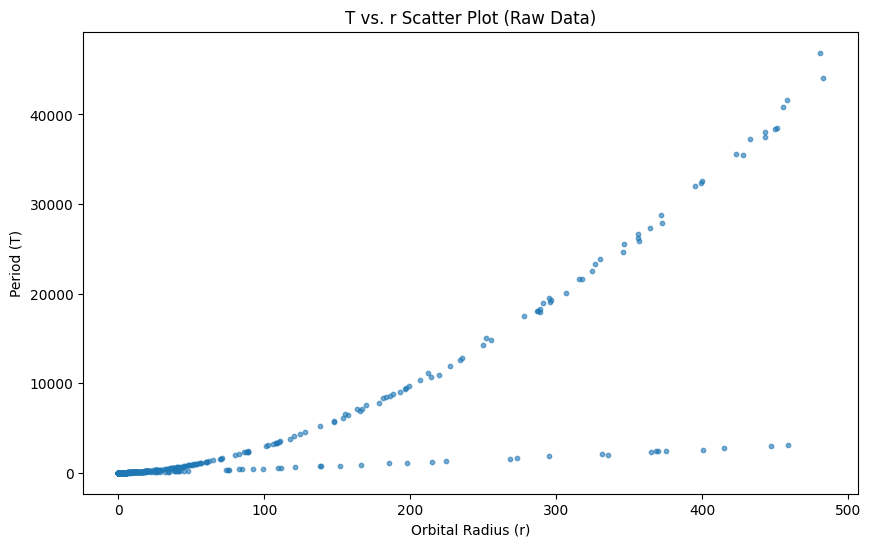

In [2]:
# 1. 定义数据文件的路径
file_path2 = 'data_training/2.csv'

# 2. 使用 pandas 读取 CSV 文件
df2 = pd.read_csv(file_path2)

# 3. 显示数据的前5行，快速预览一下
print("Data Head:")
print(df2.head())

# 4. 创建 T vs. r 散点图
plt.figure(figsize=(10, 6)) 
plt.scatter(df2['r'], df2['T'], alpha=0.6, s=10) # alpha 是透明度, s 是点的大小
plt.title('T vs. r Scatter Plot (Raw Data)')
plt.xlabel('Orbital Radius (r)')
plt.ylabel('Period (T)')
plt.show() # 显示图像

Data Head:
          T        r
0  683.9714  85.5135
1   72.2722  13.8734
2  174.8996  28.0772
3   31.0509  10.1880
4    0.1350   0.4704


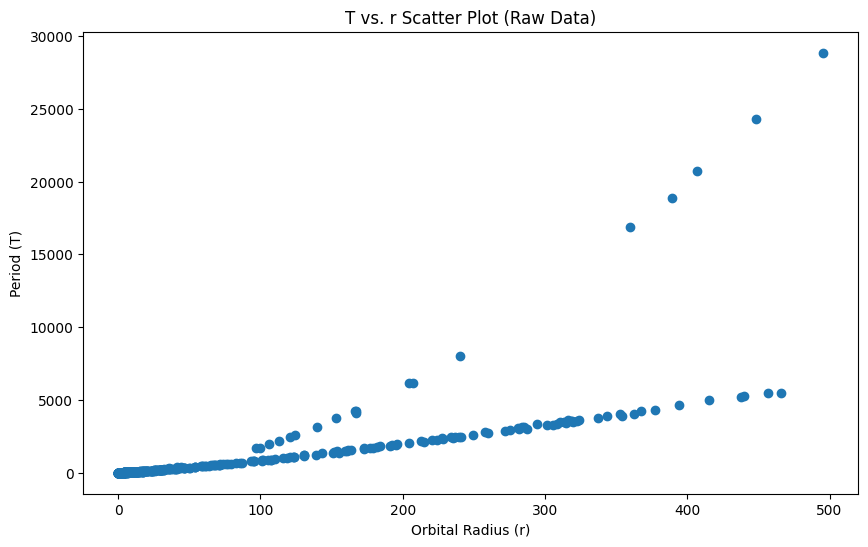

In [4]:
# 动手练习1: 请在下方编写代码，用来读取、输出、可视化5.csv文件

# 1. 定义数据文件的路径
file_path5 = 'data_training/5.csv'

# 2.【请编写代码】使用 pandas 读取 CSV 文件
df5 = pd.read_csv(file_path5)

# 3. 显示数据的前5行，快速预览一下
print("Data Head:")
print(df5.head())

# 4. 创建 T vs. r 散点图
plt.figure(figsize=(10, 6)) 
# 【请编写代码】补全plt.scatter括号中的内容
plt.scatter(x=df5['r'], y=df5['T'])
plt.title('T vs. r Scatter Plot (Raw Data)')
plt.xlabel('Orbital Radius (r)')
plt.ylabel('Period (T)')
plt.show() # 显示图像

## 第 3 步：数据变换 (Log-Log 对数图)

T-r 图显示了一种非线性（弯曲）关系，这很难直接用线性回归来建模。我们可以通过对原始方程两边应用对数变换来将这种关系线性化。

原始关系: $T = k \cdot r^\alpha$

对两边同时取 `log` (以10为底)：

$$ \log(T) = \log(k \cdot r^\alpha) $$
$$ \log(T) = \log(k) + \log(r^\alpha) $$
$$ \log(T) = \log(k) + \alpha \cdot \log(r) $$

这个方程具有直线 $y = c + m \cdot x$ 的形式：

* $y = \log(T)$
* $x = \log(r)$
* $m = \alpha$ (**斜率** 就是 `alpha`)
* $c = \log(k)$ (**y轴截距** 与 `k` 相关)

我们现在来计算 `log(T)` 和 `log(r)`，并绘制新的 `log-log` 散点图。


Data with Log-Transformed Columns:
           T         r     log_r     log_T
0     0.6619    0.4668 -0.330869 -0.179208
1  1032.7107  185.7812  2.269002  3.013979
2   136.1547   17.2978  1.237991  2.134033
3     0.9970    0.9906 -0.004102 -0.001305
4     0.3948    0.5996 -0.222138 -0.403623


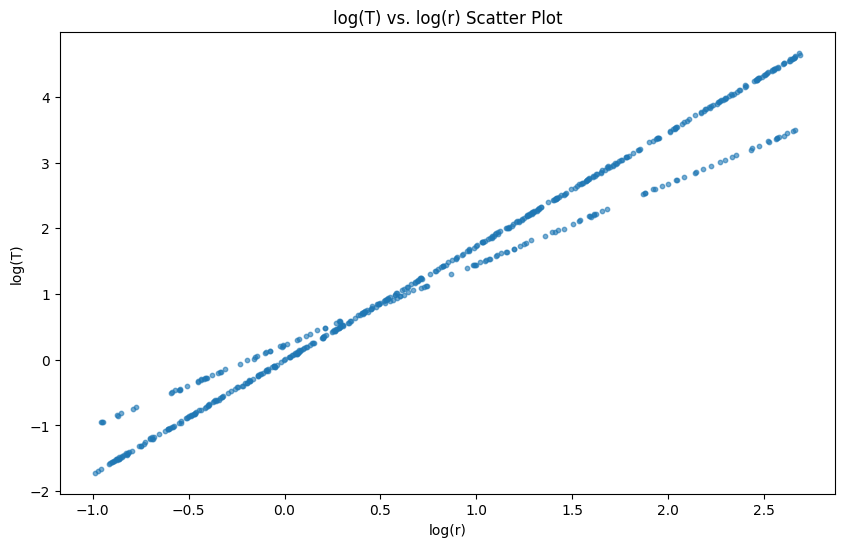

In [5]:
# 1. 计算 log_T 和 log_r (使用以10为底的对数, np.log10)，并把它们作为新的列添加到 df2中
df2['log_r'] = np.log10(df2['r'])
df2['log_T'] = np.log10(df2['T'])

# 2. 显示增加了新列的数据预览
print("\nData with Log-Transformed Columns:")
print(df2.head())

# 3. 绘制 log_T - log_r 散点图
plt.figure(figsize=(10, 6))
plt.scatter(df2['log_r'], df2['log_T'], alpha=0.6, s=10)
plt.title('log(T) vs. log(r) Scatter Plot')
plt.xlabel('log(r)')
plt.ylabel('log(T)')
plt.show()


Data with Log-Transformed Columns:
          T        r     log_r     log_T
0  683.9714  85.5135  1.932035  2.835038
1   72.2722  13.8734  1.142183  1.858971
2  174.8996  28.0772  1.448354  2.242789
3   31.0509  10.1880  1.008089  1.492074
4    0.1350   0.4704 -0.327533 -0.869666


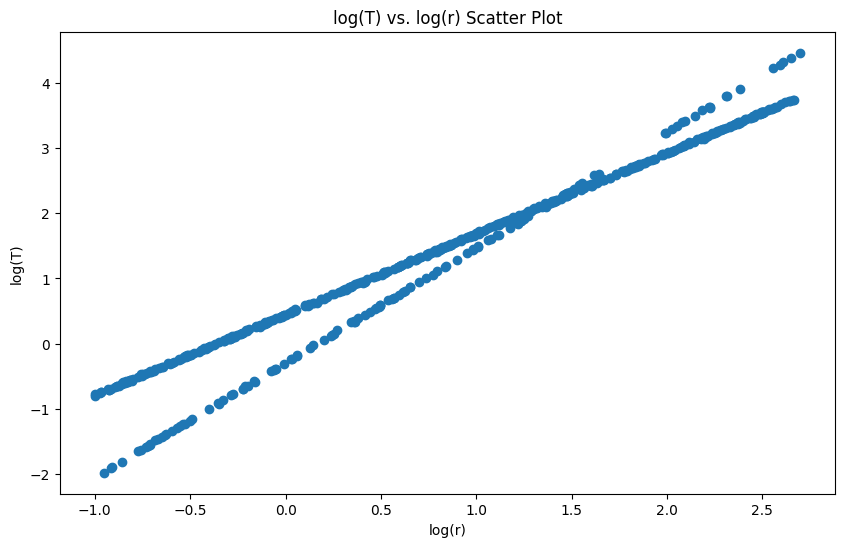

In [7]:
# 动手练习2: 请在下方编写代码，将df5的数据进行对数变换并可视化

# 1.【请编写代码】计算 log_T 和 log_r (使用以10为底的对数, np.log10)，并把它们作为新的列添加到 df5中
df5['log_r'] = np.log10(df5['r'])
df5['log_T'] = np.log10(df5['T'])

# 2. 显示增加了新列的数据预览
print("\nData with Log-Transformed Columns:")
print(df5.head())

# 3. 绘制 log_T - log_r 散点图
plt.figure(figsize=(10, 6))
# 【请编写代码】补全plt.scatter括号中的内容
plt.scatter(x=df5['log_r'], y=df5['log_T'])
plt.title('log(T) vs. log(r) Scatter Plot')
plt.xlabel('log(r)')
plt.ylabel('log(T)')
plt.show()

## 第 4 步：理解最小二乘法回归

`log-log` 图看起来是线性的。我们的目标是找到一条“最佳拟合线”来描述这些点。最常用的方法是“最小二乘法回归” (Least Squares Regression)。

该方法会找到一条唯一的直线，使得**残差平方和**最小化。“残差”是数据点到回归线的垂直距离。

--- 
### 互动模拟

为了建立直观理解，请探索 PhET 最小二乘回归模拟器：

**[PhET 最小二乘回归模拟器](https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_all.html)**

### 操作指南：

1.  选择“Custom”模式，手动添加一系列点；或使用其他模式中默认的数据点。
2.  拖动滑块，调整直线方程 $ y = ax + b $ 中 $a, b$ 的取值，试着让直线接近尽量多的数据点。
3.  勾选“**Squared Residuals（平方残差）**”复选框，这会将平方残差可视化为紫色方块。
4.  拖动滑块，调整 $a, b$ 的取值，使这些紫色方块的总面积尽可能小，也就是使得**残差平方和**最小化。
5.  勾选“**Best Fit Line（最佳拟合线）**”复选框，查看最小二乘法计算出的最优解。

--- 

**核心概念：** 线性回归就是找到那条使“残差平方和”最小化的直线的过程。

## 第 5 步：使用 Sklearn 应用线性回归

手动找到最佳拟合线是很困难的。我们将使用 `sklearn` (Scikit-learn) 库中的 `LinearRegression` 工具来自动计算我们 `log-log` 数据的最佳拟合线的斜率 (`alpha`) 和截距 (`log(k)`)。

我们先以一组没有离群点的数据 `LR-exp.csv` 为例，学习使用Sklearn进行线性回归。

--- 拟合结果 (LR-exp) ---
Slope (alpha): 1.7347
Intercept (log_k): -0.0033
Calculated k: 0.9925
==> 找到的规律: T = 0.99 * r^1.73


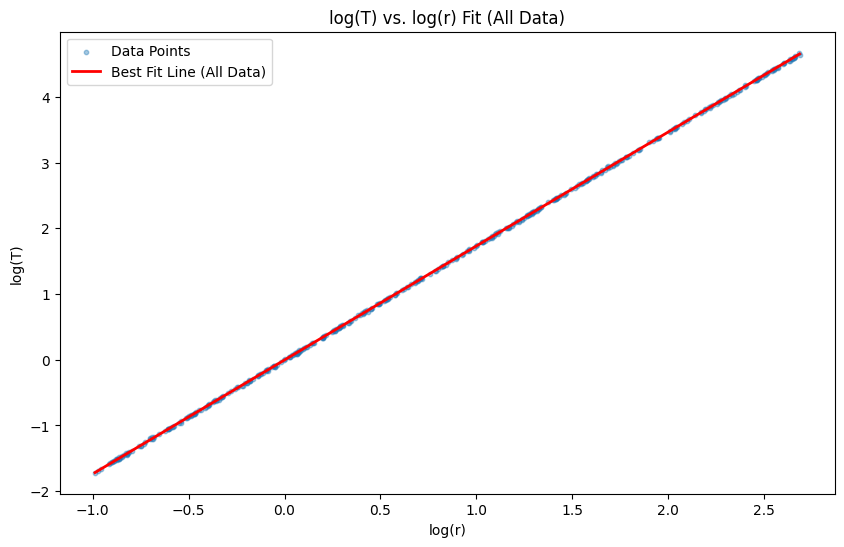

In [8]:
# 前序处理
file_path = 'LR-exp.csv'
df = pd.read_csv(file_path)

df['log_r'] = np.log10(df['r'])
df['log_T'] = np.log10(df['T'])

# 1. 准备 sklearn 所需的数据
# X 是特征 (输入), y 是目标 (输出)
# sklearn 要求 X 是一个 2D 数组, 所以我们使用 [[]]
X = df[['log_r']]
y = df['log_T']

# 2. 创建并“拟合”模型
# "fit" (拟合) 指的是在数据上训练模型
model = LinearRegression()
model.fit(X, y)

# 3. 从拟合好的模型中获取结果
alpha = model.coef_[0]  # 斜率 (m), 即 alpha
log_k = model.intercept_ # 截距 (c), 即 log(k)

# 4. 将 log(k) 转换回 k (因为我们用了 log10, 所以用 10^x)
k = 10**log_k

print(f"--- 拟合结果 (LR-exp) ---")
print(f"Slope (alpha): {alpha:.4f}")
print(f"Intercept (log_k): {log_k:.4f}")
print(f"Calculated k: {k:.4f}")
print(f"==> 找到的规律: T = {k:.2f} * r^{alpha:.2f}")

# 5. 可视化回归线
plt.figure(figsize=(10, 6))
# 绘制原始数据点
plt.scatter(df['log_r'], df['log_T'], alpha=0.4, s=10, label='Data Points')

# 为回归线创建 x 值
x_fit = pd.DataFrame({'log_r': [df['log_r'].min(), df['log_r'].max()]})
# 使用模型预测回归线的 y 值
y_fit = model.predict(x_fit)

# 绘制回归线
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Best Fit Line (All Data)')

plt.title('log(T) vs. log(r) Fit (All Data)')
plt.xlabel('log(r)')
plt.ylabel('log(T)')
plt.legend()
plt.show()

相信你已经体会到了 `Sklearn` 拟合线性数据的强大能力。

但是不要忘记，我们所获得的星系数据中，绝大部分天体（记为群体 $A$ ）的 $(T, r)$ 数据点都分布在一条平滑的曲线上，但同时也存在一些少量离群的数据点 (记为群体 $B$) 。

面对混合数据， `Sklearn` 线性拟合的效果又将如何？

--- 拟合结果 (2.csv) ---
Slope (alpha): 1.6121
Intercept (log_k): 0.0507
Calculated k: 1.1239
==> 找到的规律: T = 1.12 * r^1.61


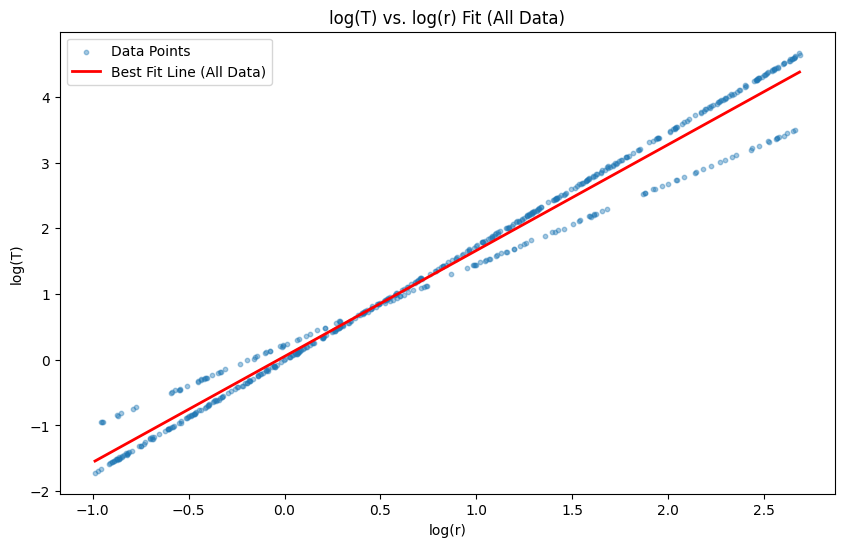

In [9]:
# 1. 准备 sklearn 所需的数据
# X 是特征 (输入), y 是目标 (输出)
# sklearn 要求 X 是一个 2D 数组, 所以我们使用 [[]]
X2 = df2[['log_r']]
y2 = df2['log_T']

# 2. 创建并“拟合”模型
# "fit" (拟合) 指的是在数据上训练模型
model = LinearRegression()
model.fit(X2, y2)

# 3. 从拟合好的模型中获取结果
alpha2 = model.coef_[0]  # 斜率 (m), 即 alpha
log_k2 = model.intercept_ # 截距 (c), 即 log(k)

# 4. 将 log(k) 转换回 k (因为我们用了 log10, 所以用 10^x)
k2 = 10**log_k2

print(f"--- 拟合结果 (2.csv) ---")
print(f"Slope (alpha): {alpha2:.4f}")
print(f"Intercept (log_k): {log_k2:.4f}")
print(f"Calculated k: {k2:.4f}")
print(f"==> 找到的规律: T = {k2:.2f} * r^{alpha2:.2f}")

# 5. 可视化回归线
plt.figure(figsize=(10, 6))
# 绘制原始数据点
plt.scatter(df2['log_r'], df2['log_T'], alpha=0.4, s=10, label='Data Points')

# 为回归线创建 x 值
x_fit2 = pd.DataFrame({'log_r': [df2['log_r'].min(), df2['log_r'].max()]})
# 使用模型预测回归线的 y 值
y_fit2 = model.predict(x_fit2)

# 绘制回归线
plt.plot(x_fit2, y_fit2, 'r-', linewidth=2, label='Best Fit Line (All Data)')

plt.title('log(T) vs. log(r) Fit (All Data)')
plt.xlabel('log(r)')
plt.ylabel('log(T)')
plt.legend()
plt.show()

--- 拟合结果 (5.csv) ---
Slope (alpha): 1.3566
Intercept (log_k): 0.2612
Calculated k: 1.8247
==> 找到的规律: T = 1.82 * r^1.36


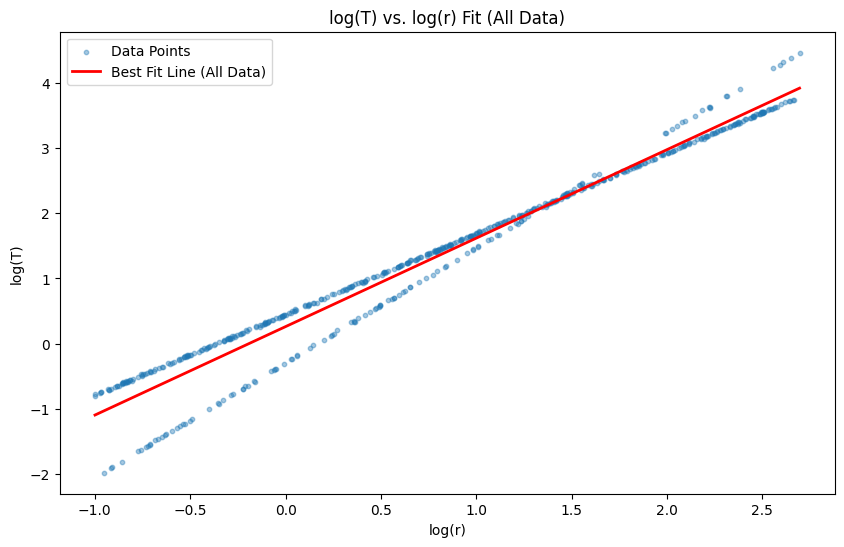

In [10]:
# 动手练习5: 请在下方编写代码，对5.csv的Log数据进行线性回归

# 1.【请编写代码】准备 sklearn 所需的数据
# X 是特征 (输入), y 是目标 (输出)
# sklearn 要求 X 是一个 2D 数组, 所以我们使用 [[]]
X5 = df5[['log_r']]
y5 = df5['log_T']

# 2. 创建并“拟合”模型
# "fit" (拟合) 指的是在数据上训练模型
model = LinearRegression()
model.fit(X5, y5)

# 3.【请编写代码】从拟合好的模型中获取结果
alpha5 = model.coef_[0]
log_k5 = model.intercept_

# 4.【请编写代码】将 log(k) 转换回 k (因为我们用了 log10, 所以用 10^x)
k5 = 10**log_k5

print(f"--- 拟合结果 (5.csv) ---")
print(f"Slope (alpha): {alpha5:.4f}")
print(f"Intercept (log_k): {log_k5:.4f}")
print(f"Calculated k: {k5:.4f}")
print(f"==> 找到的规律: T = {k5:.2f} * r^{alpha5:.2f}")

# 5. 可视化回归线
plt.figure(figsize=(10, 6))
# 绘制原始数据点
plt.scatter(df5['log_r'], df5['log_T'], alpha=0.4, s=10, label='Data Points')

# 为回归线创建 x 值
x_fit5 = pd.DataFrame({'log_r': [df5['log_r'].min(), df5['log_r'].max()]})
# 【请编写代码】使用模型预测回归线的 y 值
y_fit5 = model.predict(x_fit5)

# 绘制回归线
plt.plot(x_fit5, y_fit5, 'r-', linewidth=2, label='Best Fit Line (All Data)')

plt.title('log(T) vs. log(r) Fit (All Data)')
plt.xlabel('log(r)')
plt.ylabel('log(T)')
plt.legend()
plt.show()

## 第 6 步：分析拟合结果与离群点

观察第 5 步的图表。请注意，红线（最佳拟合线）并不能完美地代表所有数据。在左上方有一组明显的点，似乎把直线从主要密集的数据点簇中“拉”走了。

这些偏离的点被称为**离群点 (outliers)**。

在最小二乘法回归中，离群点具有很大的残差平方。模型会尽力最小化这些大误差，这会将最佳拟合线“拉”向离群点。这会使直线产生“偏移”，使其无法很好地代表主要数据簇的真实潜在关系。

为了找到主系统的真正定律，我们必须首先识别并分离这些离群点。

### 使用RANSAC算法分离混合数据

在之前的练习中，我们都假设所有数据点都遵循同一种物理规律，因此可以用一个模型（比如一条直线）来拟合。但真实世界的数据往往更加复杂。

想象一下，一个神秘的宇宙区域里，可能同时存在两种不同的物理法则在起作用，例如，一部分天体遵循一种引力规律，而另一部分则遵循另一种。如果我们把观测到的所有天体数据混在一起，它们可能会呈现出类似下图的分布。

<img src="fig-log.png" style="zoom:65%;" align="center"/>

很显然，用一条直线去拟合所有这些点，效果会非常差。我们需要一种更强大的方法，能够从混合数据中识别出各自的模式。这就是我们今天要学习的 **RANSAC（Random Sample Consensus，随机样本一致性）** 算法。

### 1. 加载并可视化“混合”数据

我们先加载`data_training/2.csv`文件，这个文件里的数据就模拟了两种规律并存的情况。我们先对它进行可视化，直观感受一下数据的分布特点。

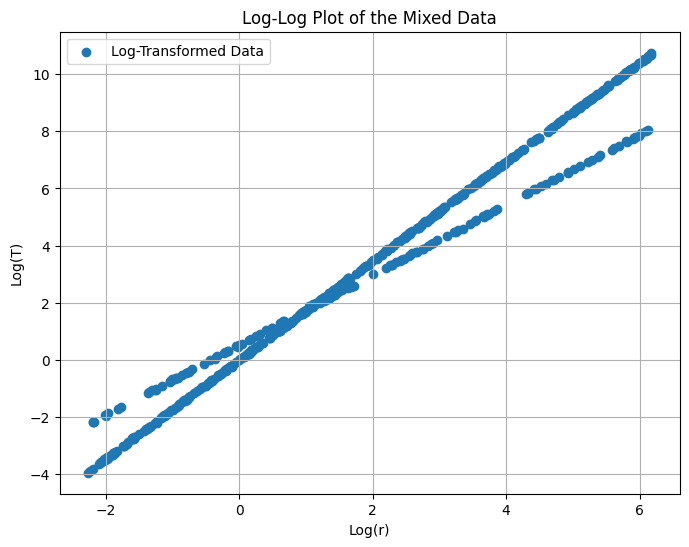

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
file_path = 'data_training/2.csv'
data = pd.read_csv(file_path, header=0)

# 对数据进行对数变换，为线性拟合做准备
data['log_r'] = np.log(data['r'])
data['log_T'] = np.log(data['T'])

# 可视化对数变换后的数据
plt.figure(figsize=(8, 6))
plt.scatter(data['log_r'], data['log_T'], label='Log-Transformed Data')
plt.xlabel('Log(r)')
plt.ylabel('Log(T)')
plt.title('Log-Log Plot of the Mixed Data')
plt.legend()
plt.grid(True)
plt.show()

### 2. RANSAC算法的核心思想

观察上图，我们可以清晰地看到数据点大致分成了两条直线。RANSAC算法的巧妙之处就在于它能像一个聪明的侦探，从一群“嫌疑人”（所有数据点）中找出真正的“团伙”（符合某一直线规律的点）。

它的核心思想是“**少数服从多数**”和“**迭代试错**”：
1.  **随机假设**：我们不信任任何一个点。算法一开始，只是随机地、不带偏见地选择极少数（比如2个）点，并假设“真相”（即真实的直线模型）就由这几个点决定。
2.  **验证假设**：基于这个“随机假设”的直线，算法会去“质问”所有其他点：“你们当中有谁离我这条线足够近？”。离得近的点被认为是“**内点**”（inliers），即支持这个假设的“同伙”；离得远的点则是“**外点**”（outliers）。
3.  **迭代与投票**：重复以上过程很多次。每次随机选择不同的点，都会得到一个不同的“候选”直线和一组支持它的“内点”。哪个“候选”直线获得的“内点”支持者最多，它就最可能是其中一条真实的规律。
4.  **最终确认**：在所有尝试中，拥有最多“内点”的那个模型，就被认为是最终的胜利者。这些“内点”就是我们成功分离出来的第一组数据。

接下来，我们将通过代码和可视化，一步步拆解这个过程。

### 3. RANSAC算法分步实现与可视化

为了更好地理解算法，我们先手动实现它的关键步骤。

### 步骤1：定义RANSAC的可调参数

RANSAC算法中有几个关键参数需要我们来设定。在这里，我们鼓励你亲手修改它们，看看会对结果产生什么影响！
- `min_samples`：随机样本数量。每次随机选择多少个点来拟合初始模型？下面给出的默认值为2，即两点确定一条直线。当然，你也可以改变这一数值
- `threshold`：内点阈值。一个点离直线多近才能被认为是“内点”？这个值决定了我们对“误差”的容忍度。太小了会漏掉很多真实点，太大了会把噪声也包含进来。

In [13]:
# RANSAC 参数
min_samples = 2     # 拟合模型所需的最少样本数
threshold = 0.1   # 判断点是否为内点的距离阈值

### 步骤2：进行一次完整的RANSAC迭代

我们先来看一轮迭代里，算法都做了些什么。下面的代码将完整展示“随机采样 -> 拟合模型 -> 判断内点”的全过程，并用可视化让你一目了然。

565
[529 252]


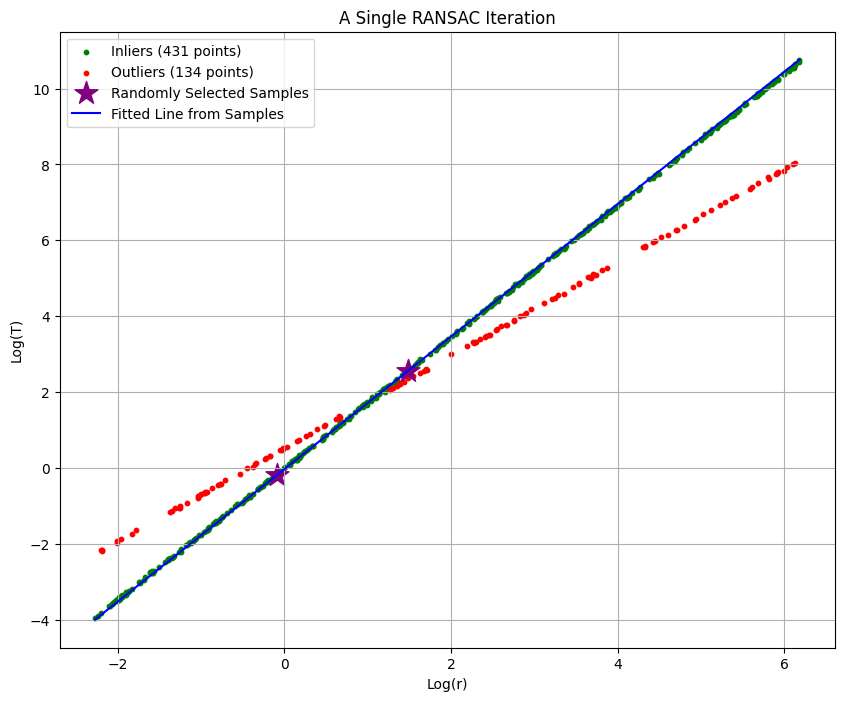

在这次随机迭代中，我们找到了 431 个内点。


In [14]:
# 准备数据
X = data['log_r'].values.reshape(-1, 1)
y = data['log_T'].values

# all_data 的每一行都代表一个 (log_r, log_T) 数据点。
all_data = np.hstack((X, y.reshape(-1, 1)))
# 计算数据点的总数 (即 all_data 数组的行数)。
n_total_samples = len(all_data)
print(n_total_samples)

# --- 单次迭代演示 ---

# 1. 随机采样
# 随机抽取 min_samples个数据点sample_points，用来做初步的直线拟合。挑选出的索引值储存在random_indices中
random_indices = np.random.choice(n_total_samples, size=min_samples, replace=False)
print(random_indices)
sample_points = all_data[random_indices]

# 2. 拟合模型 (直线)
# 使用 'sample_points' 计算模型的斜率和截距
model_m, model_c = np.polyfit(sample_points[:, 0], sample_points[:, 1], 1)

# 3. 判断内点, 核心思想为离这条直线近的被划归为内点，离这条直线远的被划归为外点. 
y_predicted = model_m * X + model_c
# 请你思考如何定义"远"和"近"?
residuals = np.abs(y - y_predicted.flatten())
inlier_mask = residuals < threshold
inliers = all_data[inlier_mask]
outliers = all_data[~inlier_mask]

# 4. 可视化单次迭代的结果
plt.figure(figsize=(10, 8))

# 绘制内点和外点
plt.scatter(inliers[:, 0], inliers[:, 1], color='green', s = 10, label=f'Inliers ({len(inliers)} points)')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', s = 10, label=f'Outliers ({len(outliers)} points)')

# 绘制随机选择的样本点
plt.scatter(sample_points[:, 0], sample_points[:, 1], color='purple', marker='*', s=300, label='Randomly Selected Samples')

# 绘制拟合的直线
x_range = np.linspace(X.min(), X.max(), 100)
y_range = model_m * x_range + model_c
plt.plot(x_range, y_range, 'b-', label='Fitted Line from Samples')

plt.title('A Single RANSAC Iteration')
plt.xlabel('Log(r)')
plt.ylabel('Log(T)')
plt.legend()
plt.grid(True)
plt.show()

print(f"在这次随机迭代中，我们找到了 {len(inliers)} 个内点。")

**动手试一试**：
多次运行上面的代码块，或在 **[RANSAC算法体验-互动页面](./RANSAC算法体验-互动页面.html)** 进行多次尝试。并且回答**任务单上的问题**：
- 每次随机选择的样本点：__________(填写颜色)星号都不同。
- 如果样本点恰好都来自同一条“真实”直线，那么拟合出的蓝色直线就能获得很多“内点”：__________(填写颜色)。
- 如果样本点不幸地来自不同的直线，那么拟合出的模型就会很差，几乎得不到任何“内点”的支持。

现在，你是否理解了RANSAC是如何通过“运气”和“投票”来寻找最佳模型的？

**请你思考**：
1. 请你将随机选择的样本点个数 `min_samples` 修改为3，重复上述步骤，你是否观察到了一些规律？
__________________________________________________________________________
2. 请你修改判断是否为内点的阈值`threshold`，重复上述步骤，你是否观察到了一些规律？
__________________________________________________________________________
3. 回看代码，请你分析该算法是如何实现内外点的区分的？
__________________________________________________________________________
4. 既然随机选点有时运气好，有时运气坏，你有没有什么想法将**你的好运气保留？**
__________________________________________________________________________

### 步骤3：完整的RANSAC循环

根据前面的讨论，一种可行的将“好运气”保留下来的思路是：**通过多次迭代循环，让算法找到那个拥有最多“内点”数目的模型**。现在让我们开始吧！

经过 100 次迭代，找到了一个包含 432 个内点的最佳模型。


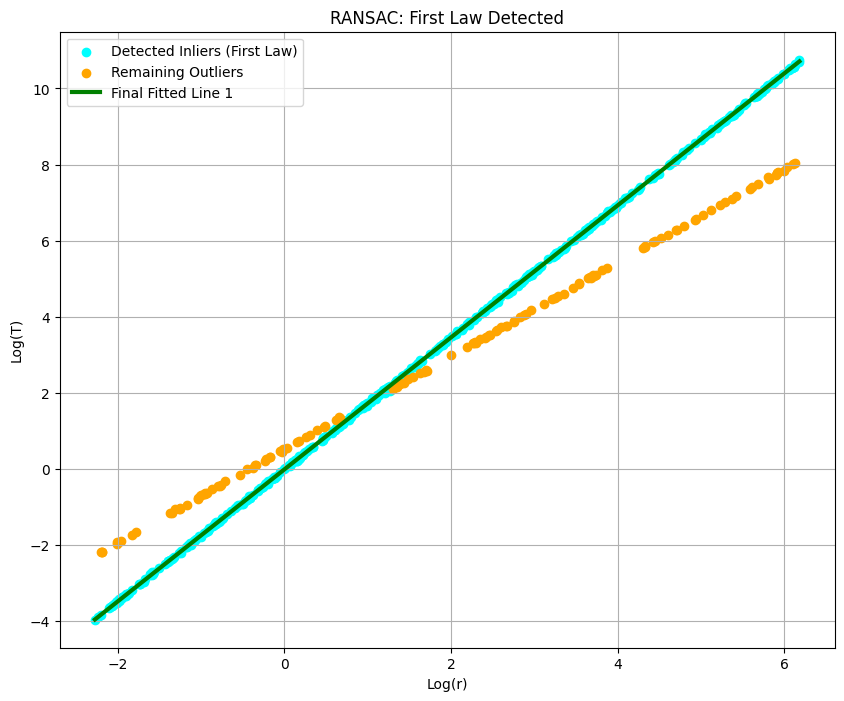

物理规律的参数 (α, k) 估计为: α_1 = 1.73, log(k_1) = -0.01


In [15]:
best_model = None
best_inlier_mask = None
max_inliers = 0

n_iterations = 100  # 迭代次数

for i in range(n_iterations):
    # 随机采样
    random_indices = np.random.choice(n_total_samples, size=min_samples, replace=False)
    sample_points = all_data[random_indices]
    
    # 拟合模型
    try:
        model_m, model_c = np.polyfit(sample_points[:, 0], sample_points[:, 1], 1)
    except (np.linalg.LinAlgError, TypeError):
        # 如果样本点无法构成直线（例如，两个点x坐标相同），则跳过此次迭代
        continue
        
    # 判断内点
    y_predicted = model_m * X + model_c
    residuals = np.abs(y - y_predicted.flatten())
    current_inlier_mask = residuals < threshold
    n_inliers = np.sum(current_inlier_mask)
    
    # 更新最佳模型
    if n_inliers > max_inliers:
        max_inliers = n_inliers
        best_inlier_mask = current_inlier_mask
        best_model = (model_m, model_c)

print(f"经过 {n_iterations} 次迭代，找到了一个包含 {max_inliers} 个内点的最佳模型。")

# 使用所有找到的内点重新拟合模型，得到更精确的结果
final_inliers = all_data[best_inlier_mask]
final_m, final_c = np.polyfit(final_inliers[:, 0], final_inliers[:, 1], 1)

# 可视化最终结果
plt.figure(figsize=(10, 8))
final_outliers = all_data[~best_inlier_mask]
plt.scatter(final_inliers[:, 0], final_inliers[:, 1], color='cyan', label='Detected Inliers (First Law)')
plt.scatter(final_outliers[:, 0], final_outliers[:, 1], color='orange', label='Remaining Outliers')

x_range = np.linspace(X.min(), X.max(), 100)
y_range = final_m * x_range + final_c
plt.plot(x_range, y_range, 'g-', linewidth=3, label='Final Fitted Line 1')

plt.title('RANSAC: First Law Detected')
plt.xlabel('Log(r)')
plt.ylabel('Log(T)')
plt.legend()
plt.grid(True)
plt.show()

print(f"物理规律的参数 (α, k) 估计为: α_1 = {final_m:.2f}, log(k_1) = {final_c:.2f}")

**试一试**
- 修改`n_iterations`参数，如果`n_iterations`太小或太大会怎样？
- 选择其它数据文件尝试分析，看看RANSAC是否能成功分离不同的线性规律。RANSAC算法能保证每次都找到正确的结果吗？为什么？

## 课程总结

恭喜你！你已经学会了：

1.  **数据可视化：** 读取文件，绘制原始 T vs. r 数据图。
2.  **数据变换：** 使用 log-log 变换来线性化关系，绘制 log T vs. log r数据图。
3.  **初始建模：** 对变换后的数据应用线性回归，获得系统规律中 $\alpha$ 和 $k$ 的取值。
4.  **问题分析：** 观察拟合结果，分析离群点对模型拟合效果的影响。
5.  **稳健建模：** 使用RANSAC方法检测和隔离离群点，提高拟合精度。

----
© 2025 陈聪颖、李秉蔚、杨阳、李怡然、刘潇及AI4S TEEN CAMP组委会
本教学材料仅供课堂教学与学术交流使用，未经书面许可，不得用于任何商业用途。